In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/content/Stock_data.csv"
df = pd.read_csv(path)
df

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.234920,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.235210,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.234350,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.234910,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.236800,1.238700,1.236285,1.238205
...,...,...,...,...,...,...
12885,11.12.2020 04:00:00.000,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,11.12.2020 08:00:00.000,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,11.12.2020 12:00:00.000,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,11.12.2020 16:00:00.000,23094.5300,1.606720,1.609540,1.605880,1.607315


In [3]:
df[df.isna().any(axis = 1)]

,Gmt time,Volume,Open,High,Low,Close


Enter the starting time in yyyy/mm/dd hh:mm:ss format: 2013/10/10
Enter the ending time in yyyy/mm/dd hh:mm:ss format: 2014/10/10


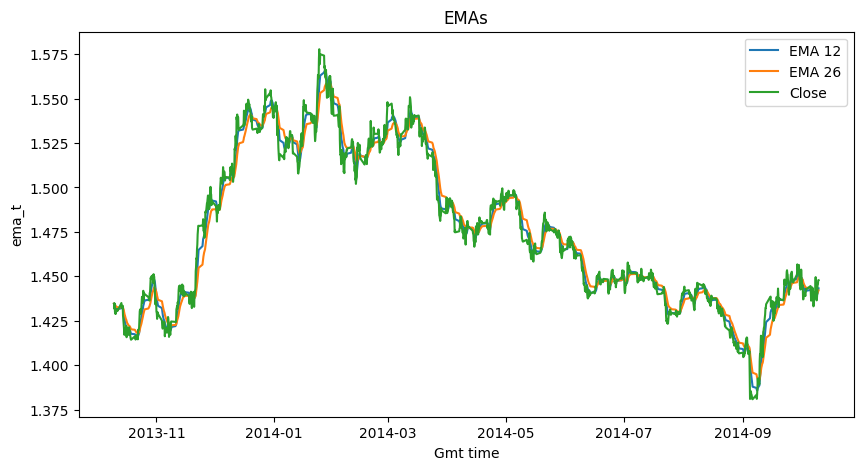

In [56]:
# take input
while True:
  try:
    sd = input("Enter the starting time in yyyy/mm/dd hh:mm:ss format: ")
    ed = input("Enter the ending time in yyyy/mm/dd hh:mm:ss format: ")
    sd = pd.to_datetime(sd)
    ed = pd.to_datetime(ed)
    break
  except Exception:
    print("Time should be realistic and in given format!")
# done taking input

df_new = df.copy()
df_new['Gmt time'] = pd.to_datetime(df_new['Gmt time'], format = "%d.%m.%Y %H:%M:%S.%f")

bet = (df_new['Gmt time'] >= sd) & (df_new['Gmt time'] <= ed)
df_new = df_new[bet].copy()

if df_new.shape[0] < 26:
  print("Given dates contain less than 26 data to create 26-period EMA")
else:
  df_new["ema_t"] = df_new["Close"].ewm(span=12, adjust=False).mean()
  df_new["ema_s"] = df_new["Close"].ewm(span=26, adjust=False).mean()

  plt.figure(figsize = (10,5))
  sns.lineplot(x = "Gmt time", y = "ema_t", data = df_new, label = "EMA 12")
  sns.lineplot(x = "Gmt time", y = "ema_s", data = df_new, label = "EMA 26")
  sns.lineplot(x = 'Gmt time', y = "Close", data = df_new, label = "Close")
  plt.title('EMAs')
  plt.legend()
  plt.show()

Enter the starting time in yyyy/mm/dd hh:mm:ss format: 2013/10/10
Enter the ending time in yyyy/mm/dd hh:mm:ss format: 2014/10/10


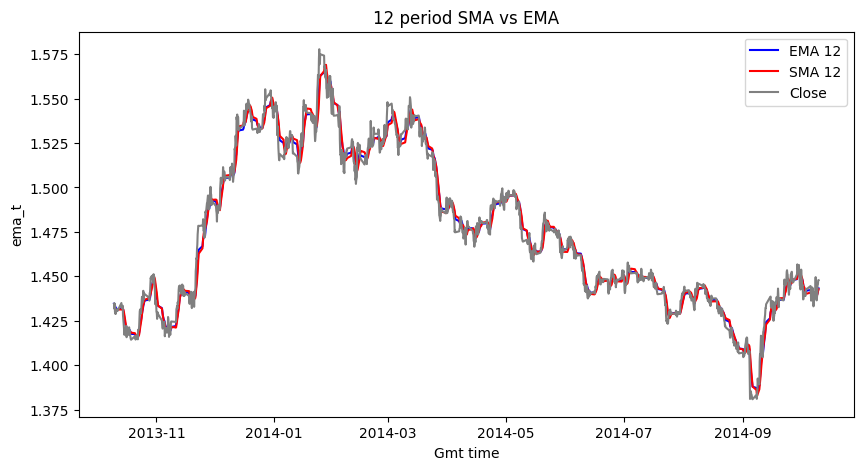

In [58]:
# take input
while True:
  try:
    sd = input("Enter the starting time in yyyy/mm/dd hh:mm:ss format: ")
    ed = input("Enter the ending time in yyyy/mm/dd hh:mm:ss format: ")
    sd = pd.to_datetime(sd)
    ed = pd.to_datetime(ed)
    break
  except Exception:
    print("Time should be realistic and in given format!")
# done taking input

df_new = df.copy()
df_new['Gmt time'] = pd.to_datetime(df_new['Gmt time'], format = "%d.%m.%Y %H:%M:%S.%f")

bet = (df_new['Gmt time'] >= sd) & (df_new['Gmt time'] <= ed)
df_new = df_new[bet].copy()

if df_new.shape[0] < 26:
  print("Given dates contain less than 26 data to create 26-period EMA")
else:
  df_new["ema_t"] = df_new["Close"].ewm(span=12, adjust=False).mean()
  df_new["sma_t"] = df_new["Close"].rolling(12).mean()

  plt.figure(figsize = (10,5))
  sns.lineplot(x = "Gmt time", y = "ema_t", data = df_new, label = "EMA 12", color = "blue")
  sns.lineplot(x = "Gmt time", y = "sma_t", data = df_new, label = "SMA 12", color = "red")
  sns.lineplot(x = 'Gmt time', y = "Close", data = df_new, label = "Close", color = "grey")
  plt.title('12 period SMA vs EMA')
  plt.legend()
  plt.show()

Enter the starting time in yyyy/mm/dd hh:mm:ss format: 2013/10/10
Enter the ending time in yyyy/mm/dd hh:mm:ss format: 2014/10/10


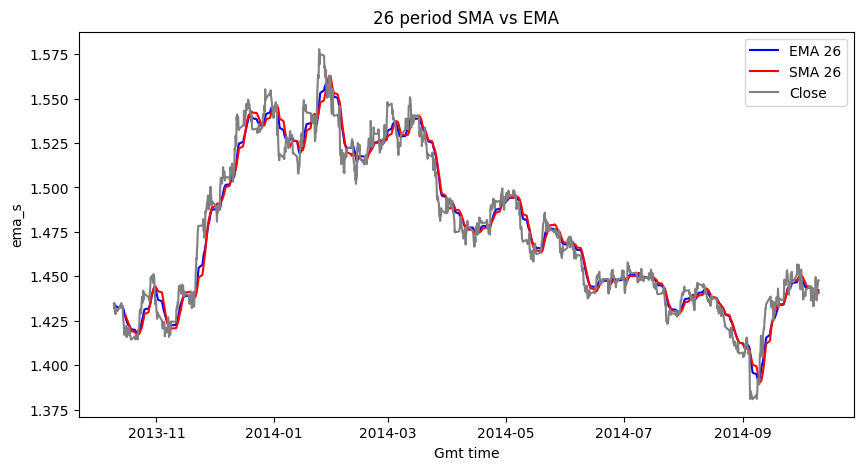

In [62]:
# take input
while True:
  try:
    sd = input("Enter the starting time in yyyy/mm/dd hh:mm:ss format: ")
    ed = input("Enter the ending time in yyyy/mm/dd hh:mm:ss format: ")
    sd = pd.to_datetime(sd)
    ed = pd.to_datetime(ed)
    break
  except Exception:
    print("Time should be realistic and in given format!")
# done taking input

df_new = df.copy()
df_new['Gmt time'] = pd.to_datetime(df_new['Gmt time'], format = "%d.%m.%Y %H:%M:%S.%f")

bet = (df_new['Gmt time'] >= sd) & (df_new['Gmt time'] <= ed)
df_new = df_new[bet].copy()

if df_new.shape[0] < 26:
  print("Given dates contain less than 26 data to create 26-period EMA")
else:
  df_new["ema_s"] = df_new["Close"].ewm(span=26, adjust=False).mean()
  df_new["sma_s"] = df_new["Close"].rolling(26).mean()

  plt.figure(figsize = (10,5))
  sns.lineplot(x = "Gmt time", y = "ema_s", data = df_new, label = "EMA 26", color = "blue")
  sns.lineplot(x = "Gmt time", y = "sma_s", data = df_new, label = "SMA 26", color = "red")
  sns.lineplot(x = 'Gmt time', y = "Close", data = df_new, label = "Close", color = "grey")
  plt.title('26 period SMA vs EMA')
  plt.legend()
  plt.show()

Enter the starting time in yyyy/mm/dd hh:mm:ss format: 2013/10/10
Enter the ending time in yyyy/mm/dd hh:mm:ss format: 2014/10/10


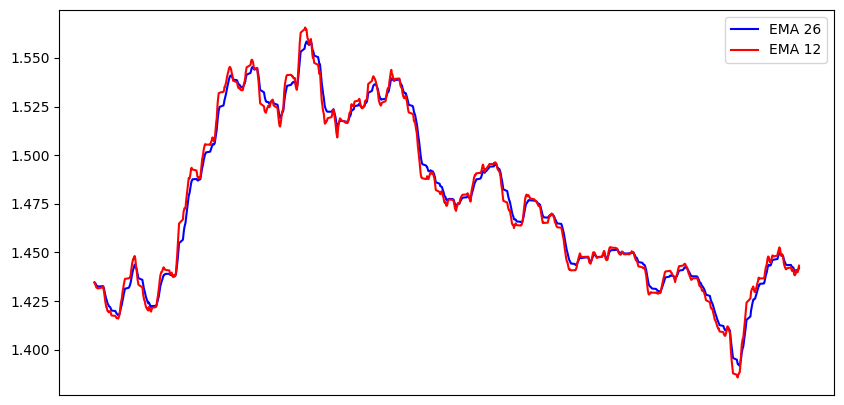

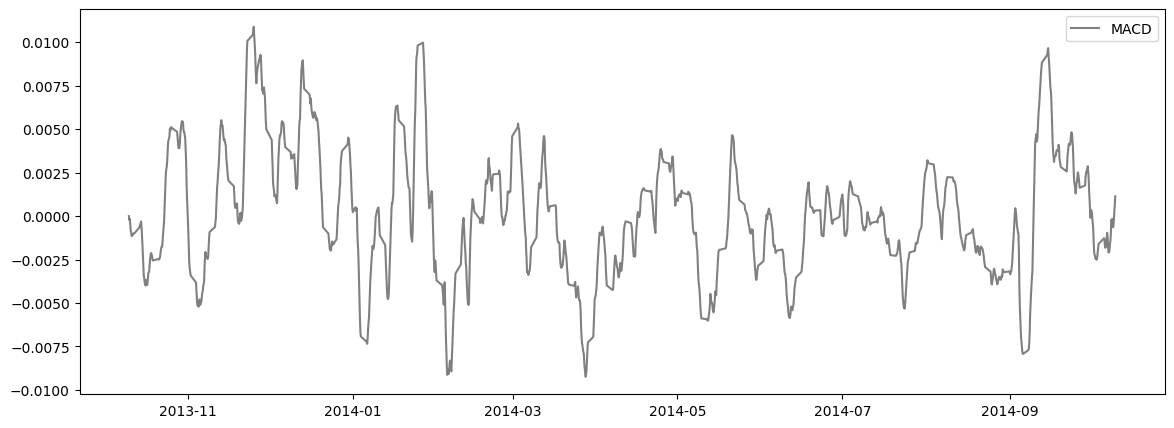

In [15]:
# take input
while True:
  try:
    sd = input("Enter the starting time in yyyy/mm/dd hh:mm:ss format: ")
    ed = input("Enter the ending time in yyyy/mm/dd hh:mm:ss format: ")
    sd = pd.to_datetime(sd)
    ed = pd.to_datetime(ed)
    break
  except Exception:
    print("Time should be realistic and in given format!")
# done taking input

df_new = df.copy()
df_new['Gmt time'] = pd.to_datetime(df_new['Gmt time'], format = "%d.%m.%Y %H:%M:%S.%f")

bet = (df_new['Gmt time'] >= sd) & (df_new['Gmt time'] <= ed)
df_new = df_new[bet].copy()

if df_new.shape[0] < 26:
  print("Given dates contain less than 26 data to create 26-period EMA")
else:
  df_new["ema_s"] = df_new["Close"].ewm(span=26, adjust=False).mean()
  df_new["ema_t"] = df_new["Close"].ewm(span=12, adjust=False).mean()
  df_new["macd"] = df_new.ema_t - df_new.ema_s

  plt.figure(figsize = (10,5))
  sns.lineplot(x = "Gmt time", y = "ema_s", data = df_new, label = "EMA 26", color = "blue")
  sns.lineplot(x = "Gmt time", y = "ema_t", data = df_new, label = "EMA 12", color = "red")
  plt.title= ("EMA 12 vs EMA 26 vs MACD")
  plt.xlabel(None)
  plt.ylabel(None)
  plt.xticks([])
  plt.show()

  plt.figure(figsize = (14,5))
  sns.lineplot(x = "Gmt time", y = "macd", data = df_new, label = "MACD", color = "grey")
  plt.xlabel(None)
  plt.ylabel(None)
  plt.show()